![title](https://i.pinimg.com/originals/e1/8c/fa/e18cfaae6f9be5c8908b32b44189f8f0.gif)

In [196]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
dataset = pd.read_csv('data/liver.csv')

In [198]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [199]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [200]:
corr = dataset.corr()
corr['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Total_Protiens                0.035008
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64

In [201]:
from sklearn.impute import SimpleImputer

In [202]:
imputer = SimpleImputer(strategy = 'mean').fit(dataset[['Albumin_and_Globulin_Ratio']])

In [203]:
imputer.statistics_

array([0.9470639])

In [204]:
bol = dataset.isnull()

In [205]:
bol.loc[bol['Albumin_and_Globulin_Ratio'] == True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,False,False,False,False,False,False,False,False,False,True,False
241,False,False,False,False,False,False,False,False,False,True,False
253,False,False,False,False,False,False,False,False,False,True,False
312,False,False,False,False,False,False,False,False,False,True,False


In [206]:
dataset['Albumin_and_Globulin_Ratio'] = imputer.transform(dataset[['Albumin_and_Globulin_Ratio']])

In [207]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [208]:
bol = dataset.isnull()

In [209]:
bol.loc[bol['Albumin_and_Globulin_Ratio'] == True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [210]:
male = dataset.loc[dataset['Gender'] == 'Male']
Female = dataset.loc[dataset['Gender'] == 'Female']

In [211]:
male_count = male.count() / dataset.count()

In [212]:
male_count # 75 % Male

Age                           0.756432
Gender                        0.756432
Total_Bilirubin               0.756432
Direct_Bilirubin              0.756432
Alkaline_Phosphotase          0.756432
Alamine_Aminotransferase      0.756432
Aspartate_Aminotransferase    0.756432
Total_Protiens                0.756432
Albumin                       0.756432
Albumin_and_Globulin_Ratio    0.756432
Dataset                       0.756432
dtype: float64

In [213]:
female_count = Female.count() / dataset.count()

In [214]:
female_count

Age                           0.243568
Gender                        0.243568
Total_Bilirubin               0.243568
Direct_Bilirubin              0.243568
Alkaline_Phosphotase          0.243568
Alamine_Aminotransferase      0.243568
Aspartate_Aminotransferase    0.243568
Total_Protiens                0.243568
Albumin                       0.243568
Albumin_and_Globulin_Ratio    0.243568
Dataset                       0.243568
dtype: float64

In [215]:
%%capture
# Some IQ time.

In [216]:
male_sick = male.loc[male['Dataset'] == 1]
female_sick = Female.loc[Female['Dataset'] == 1]

In [217]:
male_sick_prob = male_sick.count() / male.count()
male_sick_prob 

Age                           0.734694
Gender                        0.734694
Total_Bilirubin               0.734694
Direct_Bilirubin              0.734694
Alkaline_Phosphotase          0.734694
Alamine_Aminotransferase      0.734694
Aspartate_Aminotransferase    0.734694
Total_Protiens                0.734694
Albumin                       0.734694
Albumin_and_Globulin_Ratio    0.734694
Dataset                       0.734694
dtype: float64

In [218]:
Female_sick_prob = female_sick.count() / Female.count()
Female_sick_prob 

Age                           0.647887
Gender                        0.647887
Total_Bilirubin               0.647887
Direct_Bilirubin              0.647887
Alkaline_Phosphotase          0.647887
Alamine_Aminotransferase      0.647887
Aspartate_Aminotransferase    0.647887
Total_Protiens                0.647887
Albumin                       0.647887
Albumin_and_Globulin_Ratio    0.647887
Dataset                       0.647887
dtype: float64

In [219]:
%%capture
# Hmm some more brain time.

In [220]:
data_sick = dataset.loc[dataset['Dataset'] == 1]
male_cont,female_cont = male_sick.count() / data_sick.count(), female_sick.count() / data_sick.count()

In [221]:
male_cont

Age                           0.778846
Gender                        0.778846
Total_Bilirubin               0.778846
Direct_Bilirubin              0.778846
Alkaline_Phosphotase          0.778846
Alamine_Aminotransferase      0.778846
Aspartate_Aminotransferase    0.778846
Total_Protiens                0.778846
Albumin                       0.778846
Albumin_and_Globulin_Ratio    0.778846
Dataset                       0.778846
dtype: float64

In [222]:
female_cont

Age                           0.221154
Gender                        0.221154
Total_Bilirubin               0.221154
Direct_Bilirubin              0.221154
Alkaline_Phosphotase          0.221154
Alamine_Aminotransferase      0.221154
Aspartate_Aminotransferase    0.221154
Total_Protiens                0.221154
Albumin                       0.221154
Albumin_and_Globulin_Ratio    0.221154
Dataset                       0.221154
dtype: float64

In [223]:
data_sick.count()

Age                           416
Gender                        416
Total_Bilirubin               416
Direct_Bilirubin              416
Alkaline_Phosphotase          416
Alamine_Aminotransferase      416
Aspartate_Aminotransferase    416
Total_Protiens                416
Albumin                       416
Albumin_and_Globulin_Ratio    416
Dataset                       416
dtype: int64

In [224]:
female_sick.count() + male_sick.count()

Age                           416
Gender                        416
Total_Bilirubin               416
Direct_Bilirubin              416
Alkaline_Phosphotase          416
Alamine_Aminotransferase      416
Aspartate_Aminotransferase    416
Total_Protiens                416
Albumin                       416
Albumin_and_Globulin_Ratio    416
Dataset                       416
dtype: int64

In [225]:
%%capture 
"""Considering The fact that the amount of female are less but have 64 % probability means female have more chance of having
this disease"""

# Visualizing And Looking For more relations

In [226]:
male_sick['Age'].min(),male_sick['Age'].max() # Minimum Age is 12 # Maximum Age is 89 > (90)


(12, 90)

In [227]:
male.columns.values

array(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'], dtype=object)

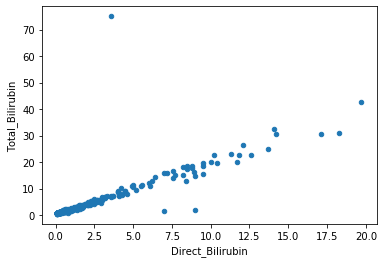

In [228]:
male.plot(kind='scatter', x='Direct_Bilirubin', y='Total_Bilirubin',sharex=False)

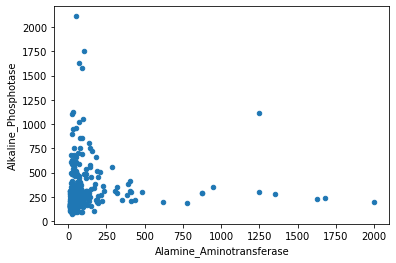

In [229]:
male.plot(kind='scatter', x='Alamine_Aminotransferase', y='Alkaline_Phosphotase',sharex=False)

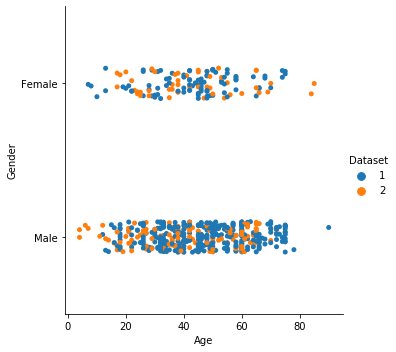

In [230]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=dataset)

In [231]:
male_sick['Age'].mean(),female_sick['Age'].mean()

(46.95061728395062, 43.34782608695652)

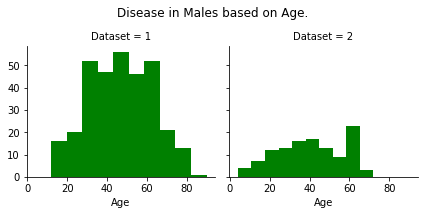

In [232]:
grid = sns.FacetGrid(male, col='Dataset', margin_titles=False)
grid.map(plt.hist, 'Age', color='Green') # For Male
grid.fig.suptitle("Disease in Males based on Age.")
plt.subplots_adjust(top=0.8)

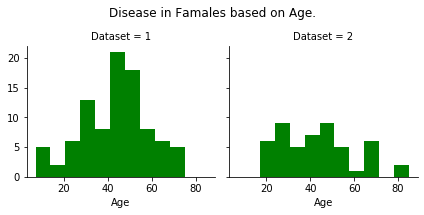

In [233]:
grid = sns.FacetGrid(Female, col='Dataset', margin_titles=False)
grid.map(plt.hist, 'Age', color='Green') # For Female
grid.fig.suptitle("Disease in Famales based on Age.")
plt.subplots_adjust(top=0.8)

In [234]:
# from this its proved that age is importand feature.

# Feature Elimination + Selection

In [235]:
%%capture
"""
Lets check for relations and select features
"""

In [236]:
dataset.columns.values

array(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'], dtype=object)

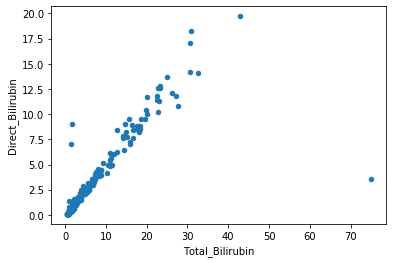

In [237]:
dataset.plot(kind='scatter', x='Total_Bilirubin', y='Direct_Bilirubin') # Linear Relation

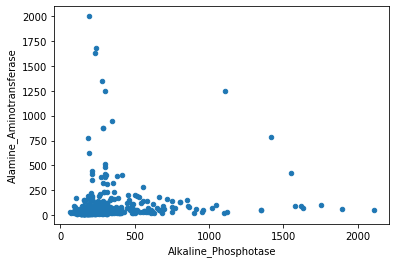

In [238]:
dataset.plot(kind='scatter', x='Alkaline_Phosphotase', y='Alamine_Aminotransferase') # Non Linear Relation

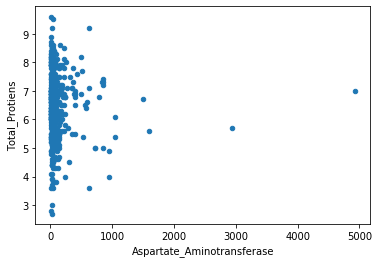

In [239]:
dataset.plot(kind='scatter', x='Aspartate_Aminotransferase', y='Total_Protiens') # Linear Relation

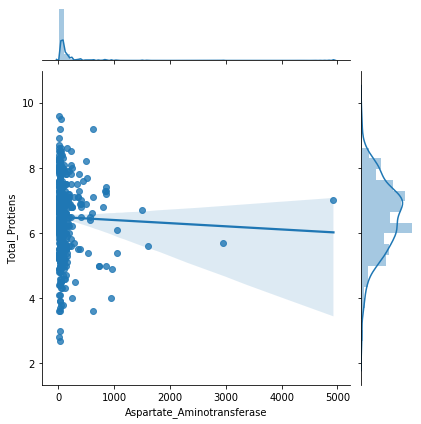

In [240]:
sns.jointplot('Aspartate_Aminotransferase', 'Total_Protiens', data=dataset, kind='reg') # Not Linear

In [241]:
dataset.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


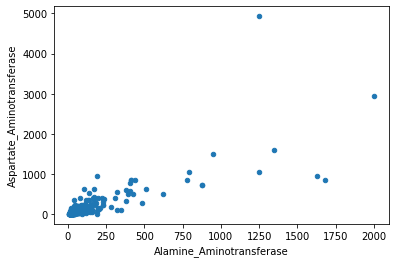

In [242]:
dataset.plot(kind='scatter', x='Alamine_Aminotransferase', y='Aspartate_Aminotransferase') # Linear Relation

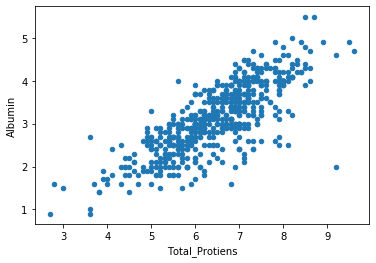

In [243]:
dataset.plot(kind='scatter', x='Total_Protiens', y='Albumin') # Linear Relation

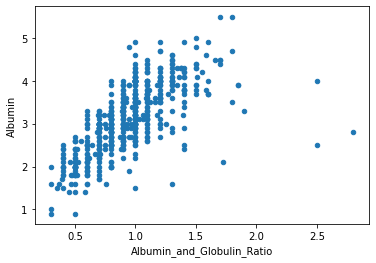

In [244]:
dataset.plot(kind='scatter', x='Albumin_and_Globulin_Ratio', y='Albumin') # Linear Relation

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
data_x = dataset.drop(['Dataset'] ,1, inplace = False)
data_y = dataset['Dataset']

In [247]:
data_x = data_x[['Gender',
                 'Albumin',
                 'Albumin_and_Globulin_Ratio',
                 'Total_Bilirubin',
                 'Alamine_Aminotransferase',
                 'Total_Protiens',
                'Age']]
data_x = pd.concat([data_x, pd.get_dummies(data_x['Gender'], prefix = 'Gender')], 1)

In [248]:
data_x = data_x.drop('Gender', 1, inplace=False)

In [255]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size = 0.25, random_state = 42)

In [256]:
x_train

,Albumin,Albumin_and_Globulin_Ratio,Total_Bilirubin,Alamine_Aminotransferase,Total_Protiens,Age,Gender_Female,Gender_Male
231,4.3,1.00,0.8,85,8.5,61,0,1
22,3.1,0.90,6.8,116,6.4,62,0,1
423,3.9,1.50,1.6,44,6.5,53,0,1
116,2.0,0.60,0.7,74,5.3,48,0,1
89,3.3,0.80,4.0,119,7.1,60,0,1
...,...,...,...,...,...,...,...,...
71,1.8,0.60,0.8,20,4.4,75,1,0
106,2.6,1.00,5.3,32,5.1,36,0,1
270,4.9,1.00,0.7,96,9.5,37,0,1
435,4.5,1.70,0.5,28,7.1,17,1,0


# Using Logestic Model

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
y_train

231    1
22     1
423    2
116    1
89     1
      ..
71     1
106    2
270    1
435    2
102    1
Name: Dataset, Length: 437, dtype: int64

In [271]:
model = LogisticRegression().fit(x_train, y_train)

C:\Users\habab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [272]:
predictions = model.predict(x_train)

In [273]:
model.score(x_train, y_train) * 100

72.5400457665904

# Prediction Test Model

In [281]:
model.score(x_test, y_test) * 100
predictions_test = model.predict(x_test)

# Visualization

In [282]:
from matplotlib.colors import ListedColormap

In [290]:
# ????

# Checks

In [284]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [285]:
predictions_test

array([2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2], dtype=int64)

In [287]:
accuracy = accuracy_score(y_test, predictions_test)
accuracy

0.7191780821917808

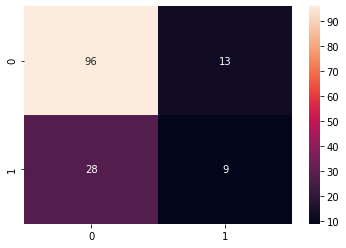

In [288]:
sns.heatmap(confusion_matrix(y_test,predictions_test),annot=True,fmt="d")

In [ ]:
%%capture
"""

Kernel Author: Habab
Dataset Source : https://www.kaggle.com/uciml/indian-liver-patient-records
Special Thanks: Sangeetha James (https://www.kaggle.com/sanjames)

Problem Type: Classification


"""